In [1]:
# !pip install lifelines

In [41]:
import pandas

In [42]:
cancer = pandas.read_csv('cancer.csv', index_col=0) 
# index_col는 행번호가 있는 곳이 0번이다 라는 뜻 (행번호칼럼이 없어지고 인덱스로 12345가 생김)

In [43]:
cancer.head()

,type,time,delta
1,1,1,1
2,1,3,1
3,1,3,1
4,1,4,1
5,1,10,1


In [44]:
from lifelines import KaplanMeierFitter #카플란마이어 생존함수 

# kmf만 먼저 돌려보기

In [45]:
kmf = KaplanMeierFitter()

In [46]:
kmf.fit(cancer['time'], cancer['delta']) #시간, delta = 죽은 사람 숫자 

<lifelines.KaplanMeierFitter: fitted with 80 total observations, 27 right-censored observations>

In [47]:
cancer.query('delta == 0') # delta ==0 인 경우, 즉 ,그 시점에 추적이 안된 사례 
# 생존분석할 때 서비스가 안 오는 건 괜찮음 그걸 보려는 거니까 
# 근데 병이 낫는 지를 보고 싶다 할땐 애매함. 오지 않으면 모르니까... 그래서 kmf 해서 적당히 잘라서 보여줌 
# 가정 : 무작위 적으로 안 나올 거다 (죽었을 지, 안 죽었을 지는 모른다. 나온 사람도 안 나온 사람도 비슷한 수준으로 죽었을 것이다)

,type,time,delta
32,1,61,0
33,1,74,0
34,1,79,0
35,1,80,0
36,1,81,0
37,1,87,0
38,1,87,0
39,1,88,0
40,1,89,0
41,1,93,0


In [48]:
from matplotlib import pyplot

In [49]:
kmf.survival_function_ # 생존 함수를 수치로 

,KM_estimate
timeline,
0.0,1.000000
1.0,0.975000
3.0,0.937500
4.0,0.912500
5.0,0.887500
8.0,0.875000
10.0,0.862319
12.0,0.849638
13.0,0.811594


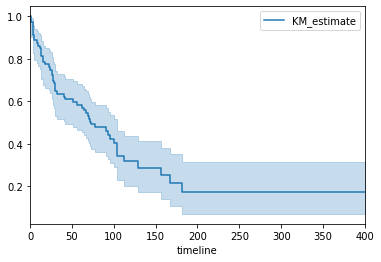

In [50]:
kmf.plot_survival_function() # 생존함수 그래프 

# type ==1 인 사람만 뽑아내기 

In [51]:
cancer1 = cancer.query('type == 1')

In [52]:
kmf1 = KaplanMeierFitter()

In [53]:
kmf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1')
# label : 그래프를 그릴 때 type1이라고 적어라 

<lifelines.KaplanMeierFitter: fitted with 52 total observations, 21 right-censored observations>

In [54]:
kmf1.survival_function_

,type 1
timeline,
0.0,1.000000
1.0,0.980769
3.0,0.942308
4.0,0.923077
10.0,0.903846
13.0,0.865385
16.0,0.826923
24.0,0.807692
26.0,0.788462


In [55]:
kmf1.cumulative_density_

,type 1
timeline,
0.0,0.000000
1.0,0.019231
3.0,0.057692
4.0,0.076923
10.0,0.096154
13.0,0.134615
16.0,0.173077
24.0,0.192308
26.0,0.211538


In [56]:
kmf1.median_

/usr/local/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:287: FutureWarning: Please use `median_survival_time_` property instead. Future property `median_` will be removed.
  FutureWarning,


93.0

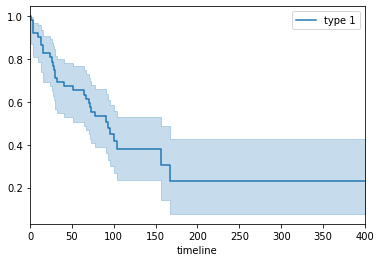

In [57]:
kmf1.plot()

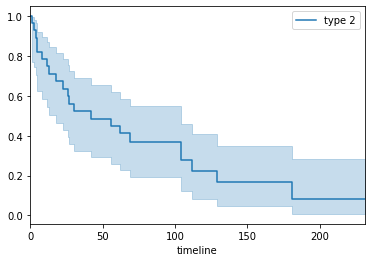

In [58]:
cancer2 = cancer.query('type == 2')
kmf2 = KaplanMeierFitter()
kmf2.fit(cancer2['time'], event_observed=cancer2['delta'], label='type 2')
kmf2.plot()

In [59]:
from matplotlib import pyplot

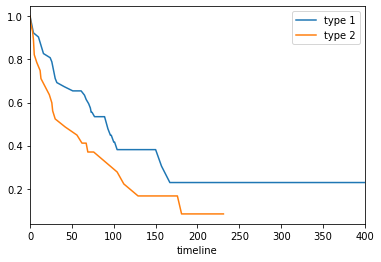

In [60]:
#타입1, 타입2 한번에 비교 
ax = kmf1.survival_function_.plot() #ax = kmf1의 plot 그냥 kmf1.plot() 해도 됨 ㅎㅎ 
kmf2.survival_function_.plot(ax=ax) #ax=ax 덮어써라. 
# 타입 1이랑 비교해보니까 타입2 가 더 심한 병(더 빨리 죽음) 

In [61]:
from lifelines.statistics import logrank_test
# logrank_test : 다른 두개의 그래프가 있을 때 정말 다르냐? 를 볼 때 사용 

In [62]:
summary = logrank_test(cancer1['time'], cancer2['time'], cancer1['delta'], cancer2['delta'], alpha=.95) # 95% 신뢰구간 기준

In [63]:
summary.print_summary()
# p = 0.09 (유의미하지 않음 -> 차이가 난다고 말할 수 없음. 0.05보다 밑이여야함)

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic    p  -log2(p)
           2.79 0.09      3.40


# p = 0.09 (유의미하지 않음 -> 차이가 난다고 말할 수 없음. 0.05보다 밑이여야함)

In [66]:
from lifelines import NelsonAalenFitter

In [67]:
naf1 = NelsonAalenFitter()

In [68]:
naf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1')

<lifelines.NelsonAalenFitter: fitted with 52 total observations, 21 right-censored observations>

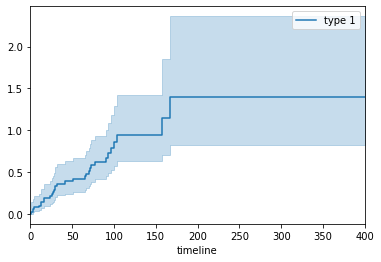

In [69]:
naf1.plot()

In [70]:
from lifelines import ExponentialFitter

In [71]:
ef1 = ExponentialFitter()

In [72]:
ef1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (Exponential)')

<lifelines.ExponentialFitter: fitted with 52 total observations, 21 right-censored observations>

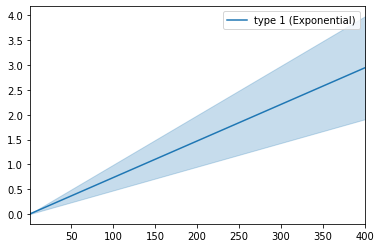

In [73]:
ef1.plot()

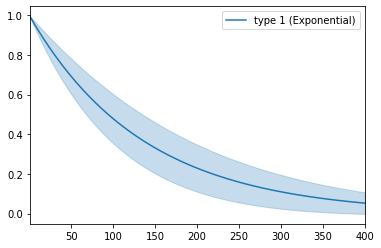

In [74]:
ef1.plot_survival_function()
# 매끄러운 형태로 떨어짐 (가정을 해서 예상한 거니까 -> 매끄러운 형태가 더 보기 좋음)

In [60]:
ef1.log_likelihood_

-183.24816317243193

In [61]:
2 * 1 - 2 * wf1.log_likelihood_  # AIC

366.9356548843635

In [75]:
from lifelines import WeibullFitter

In [76]:
wf1 = WeibullFitter()

In [77]:
wf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (Weibul)')

<lifelines.WeibullFitter: fitted with 52 total observations, 21 right-censored observations>

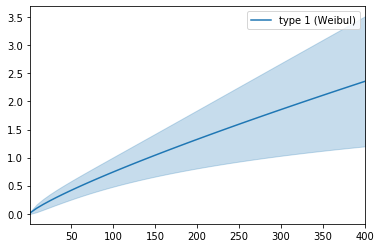

In [78]:
wf1.plot()

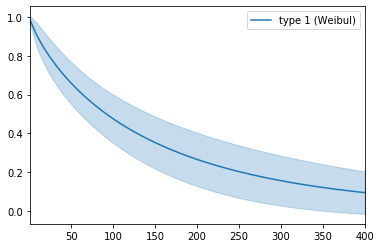

In [79]:
wf1.plot_survival_function()

In [52]:
wf1.log_likelihood_

-182.46782744218174

In [54]:
2 * 2 - 2 * wf1.log_likelihood_  # AIC

368.9356548843635

### aic 비교해보니까 지수 모형이 더 낮음 -> 여기서는 더 좋음.
### 근데 사실 베이불이 지수 모형 확장한 거니까 그냥 베이불 쓰면 됨.

# 시각화로 둘 다 겹쳐보기

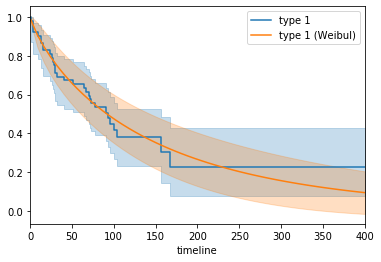

In [82]:
ax = kmf1.plot_survival_function()
wf1.plot_survival_function(ax=ax)
# 그래서 파란 구간(km): 실제 데이터를 많이 활용해서 구불구불, weibull은 매끄러움 

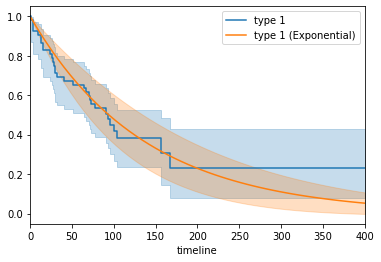

In [83]:
ax = kmf1.plot_survival_function()
ef1.plot_survival_function(ax=ax) #지수함수 

# 생존 회귀 -> 콕스 회귀

In [86]:
from lifelines.datasets import load_rossi #lifelines에 내장 되어 있는 데이터 load_rossi

In [87]:
rossi = load_rossi() 

In [88]:
rossi.head()
# 생존률 : 다시 범죄를 저지르지 않는 거 -> 이거 어떤 변수에 영향을 받을까 
# 생존 분석 + 회쉬 분석 -> 생존 회귀 

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


- fin: 경제적 지원
- age: 나이
- race: 인종
- wexp: 직업 경험
- mar: 결혼
- paro: 가석방
- prio: 전과

In [89]:
from lifelines import CoxPHFitter

In [90]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest', show_progress=True)

cph.print_summary()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2019-10-07 06:32:31 UTC

---
       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
fin   -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age   -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race   0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp  -0.15       0.86       0.21            -0.57             0.27    

### 변수들에 따라 다른 위험도 exp(coef) -> 위험비는 1과 비교 (1보다 높다 낮다) 
### ex) 결혼한 사람이 안한 사람보다 재범 할 확률이 0.6배 -> 근데 생존함수를 보면 원래 위험이 50 이면(시점마다 잡힐 확률) 50*0.65 -> 32.5% 그니까 생존함수는 완만한 곡선이 됨  (보민님 사진 참고)
### 그럼 대체 위험비를 왜 확인하는 가? -> 생존 회귀를 하면 한 그래프만 나오는 데, 독립변수들의 그래프를 보기 위해. 예를 들면 가석방을 한다고 할 때 누굴 해야하는가? 결혼한 죄수들은 재범률을 더 낮출 수 있는 군, 이런 지표로 사용간으
### p 값도 확인 (<0.05 보다 작아야 유의미인데  거의 다 큼...무의미 (prio 전과, fin,age 빼고! ))

# 결혼 유무

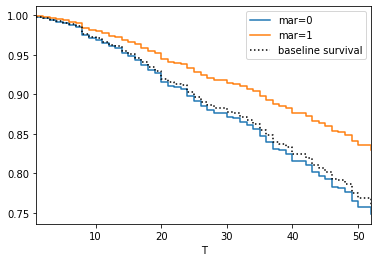

In [92]:
cph.plot_covariate_groups('mar',[0,1])

In [93]:
# 나이

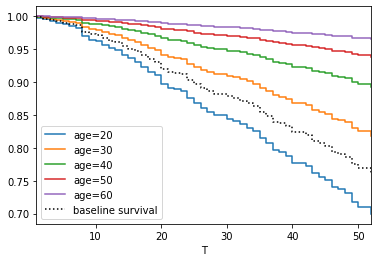

In [94]:
cph.plot_covariate_groups('age',[20,30,40,50,60])